## Read Image

In [1]:
import numpy as np
import cv2

image_path = '1.jpg'
img = cv2.imread(image_path, 1)


if img is None:
    print("Error: Image not found or unable to load.")
else:

    img_resized = cv2.resize(img, (400, 600))

    cv2.imshow('image', img_resized)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()


## Write Image

Following program loads an image and saves its greyscale version when ‘s’ key
is pressed:

In [2]:
import numpy as np
import cv2

img = cv2.imread(image_path,0)
cv2.imshow('image',img)
key=cv2.waitKey(0)
if key==ord('s'):
    cv2.imwrite(f"GS_{image_path}", img)
cv2.destroyAllWindows()

## Channels

In [3]:
import numpy as np
import cv2

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
b, g, r = cv2.split(img)

b = cv2.resize(b, (200, 400))
g = cv2.resize(g, (200, 400))
r = cv2.resize(r, (200, 400))

cv2.imshow('Blue Channel', b)
cv2.imshow('Green Channel', g)
cv2.imshow('Red Channel', r)
cv2.waitKey(0)
cv2.destroyAllWindows()



## **Bitwise Operation**

To demonstrate the use of these operators, two images with filled and empty circles are
taken.
Following program demonstrates the use of bitwise operators in OpenCV-Python:

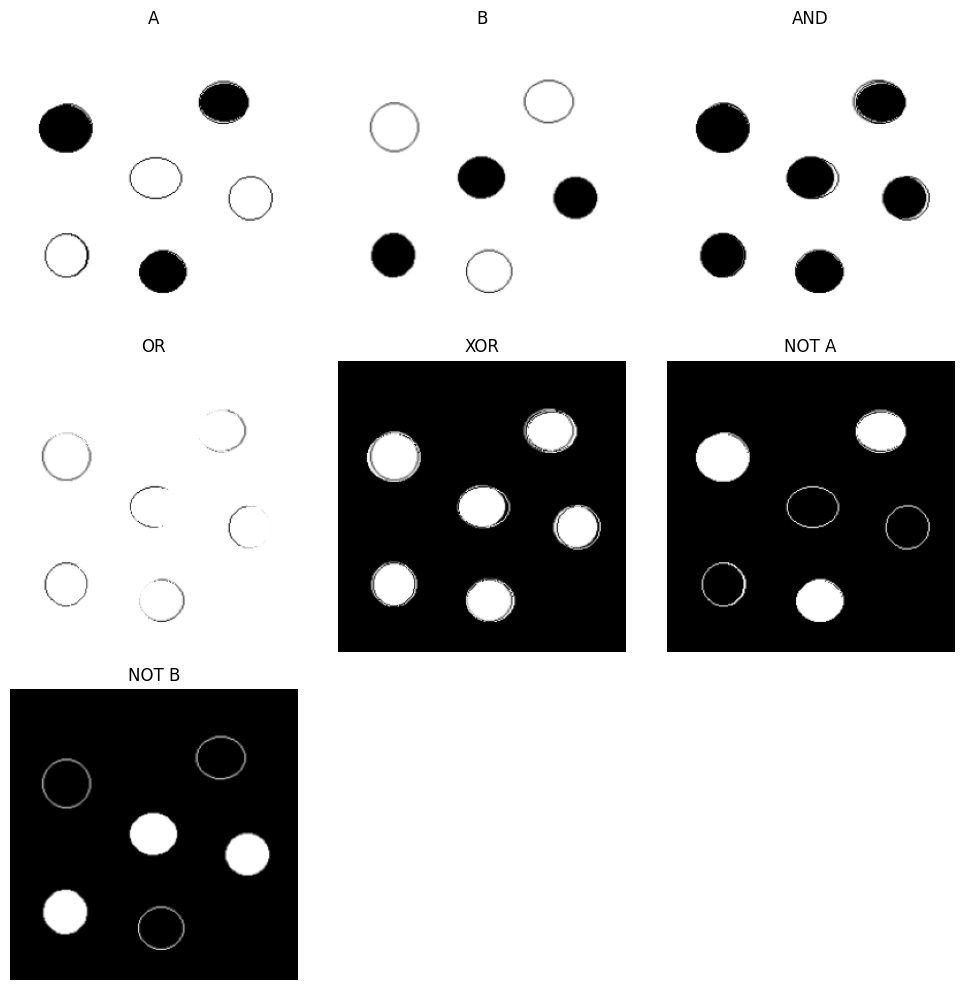

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('a.png')
img2 = cv2.imread('b.png')

height, width = img1.shape[:2]
img2 = cv2.resize(img2, (width, height))

dest1 = cv2.bitwise_and(img2, img1, mask=None)
dest2 = cv2.bitwise_or(img2, img1, mask=None)
dest3 = cv2.bitwise_xor(img1, img2, mask=None)
not_img1 = cv2.bitwise_not(img1)
not_img2 = cv2.bitwise_not(img2)

images = [img1, img2, dest1, dest2, dest3, not_img1, not_img2]
titles = ['A', 'B', 'AND', 'OR', 'XOR', 'NOT A', 'NOT B']

plt.figure(figsize=(10, 10))

for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In another example involving bitwise operations, the opencv logo is superimposed on
another image. Here, we obtain a mask array calling threshold() function on the logo
and perform AND operation between them.
Similarly, by NOT operation, we get an inverse mask. Also, we get AND with the
background image.
Following is the program which determines the use of bitwise operations:

## **Draw Shapes and Text**

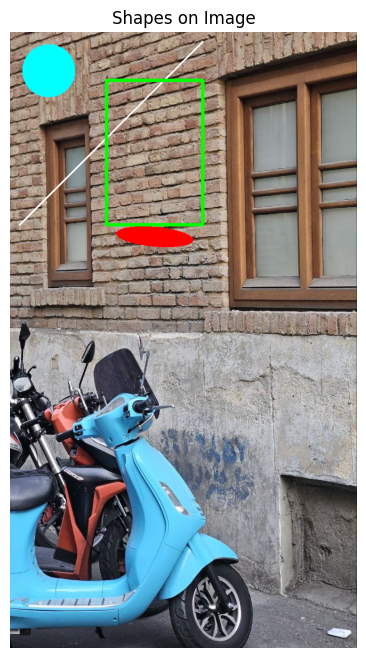

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path, 1)

cv2.line(img, (20, 400), (400, 20), (255, 255, 255), 3)
cv2.rectangle(img, (200, 100), (400, 400), (0, 255, 0), 5)
cv2.circle(img, (80, 80), 55, (255, 255, 0), -1)
cv2.ellipse(img, (300, 425), (80, 20), 5, 0, 360, (0, 0, 255), -1)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Shapes on Image")
plt.show()


Following program adds a text caption to a photograph.

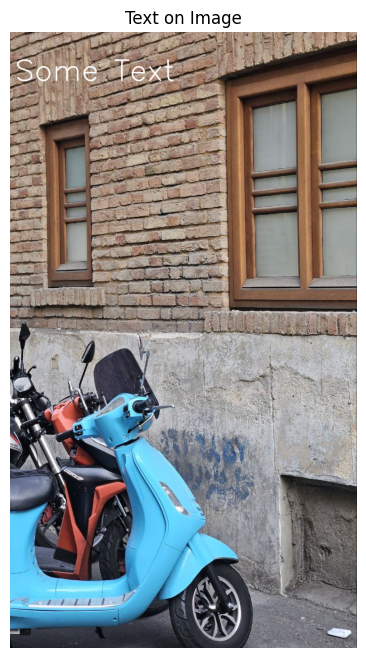

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path, 1)
txt = "Some Text"
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, txt, (10, 100), font, 2, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Text on Image")
plt.show()


## Mouse Events

In [7]:
import cv2
import numpy as np

drawing = False
mode = True
ix, iy = -1, -1
rectangles = []
circles = []

def mouse_event_handler(event, x, y, flags, param):
    global ix, iy, drawing, mode, rectangles, circles

    # Left mouse button down - start drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    # Mouse move - update the shape being drawn
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_copy = img.copy()
            if mode:  # Drawing rectangle
                cv2.rectangle(img_copy, (ix, iy), (x, y), (0, 255, 0), 2)
            else:  # Drawing circle
                radius = int(np.sqrt((x - ix) ** 2 + (y - iy) ** 2))
                cv2.circle(img_copy, (ix, iy), radius, (0, 0, 255), 2)
            cv2.imshow("Mouse Event Window", img_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode:
            rectangles.append((ix, iy, x, y))
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
        else:
            radius = int(np.sqrt((x - ix) ** 2 + (y - iy) ** 2))
            circles.append((ix, iy, radius))
            cv2.circle(img, (ix, iy), radius, (0, 0, 255), 2)
        cv2.imshow("Mouse Event Window", img)

    elif event == cv2.EVENT_RBUTTONDOWN:
        mode = not mode
        shape = "Rectangle" if mode else "Circle"
        print(f"Switched to {shape} mode")

img = np.ones((512, 512, 3), dtype=np.uint8) * 255

cv2.namedWindow("Mouse Event Window")
cv2.setMouseCallback("Mouse Event Window", mouse_event_handler)

while True:
    cv2.imshow("Mouse Event Window", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


## Resize Image

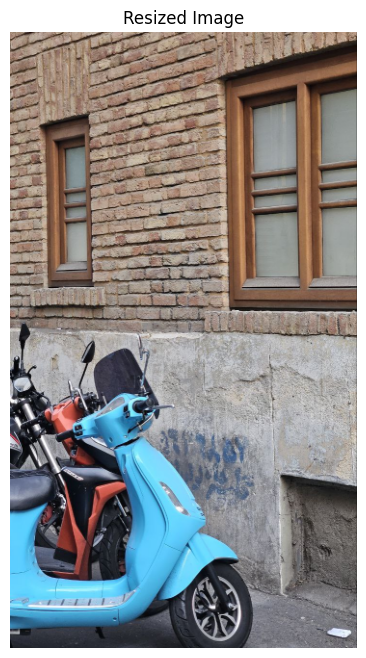

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path, 1)
height, width = img.shape[:2]
res = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Resized Image")
plt.show()


## Rotate Image

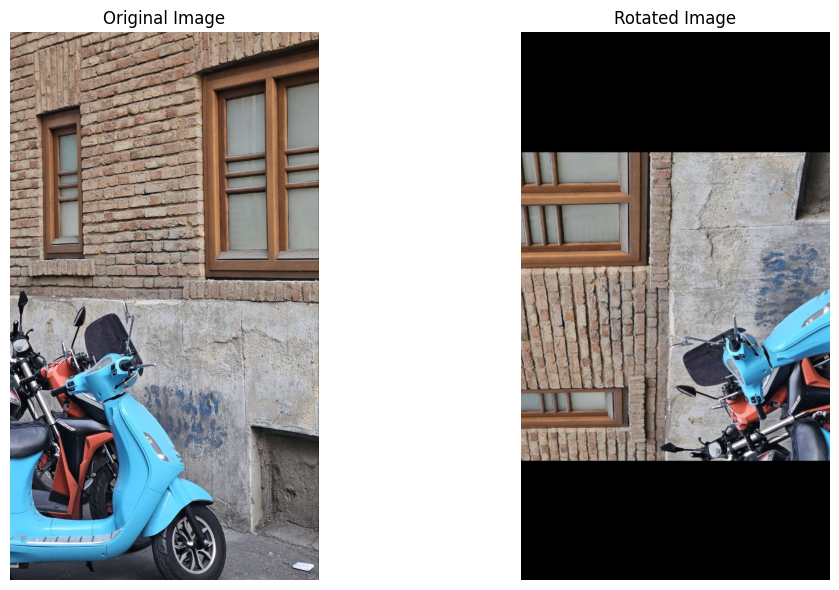

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path, 1)
h, w = img.shape[:2]
center = (w / 2, h / 2)
mat = cv2.getRotationMatrix2D(center, 90, 1)
rotimg = cv2.warpAffine(img, mat, (w, h))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotimg, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')

plt.tight_layout()
plt.show()


## Threshold Image

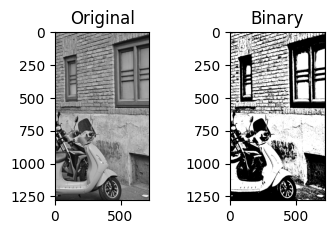

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(image_path,0)
ret,img1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

plt.subplot(2,3,1),plt.imshow(img,'gray',vmin=0,vmax=255)
plt.title('Original')
plt.subplot(2,3,2),plt.imshow(img1,'gray',vmin=0,vmax=255)
plt.title('Binary')
plt.show()

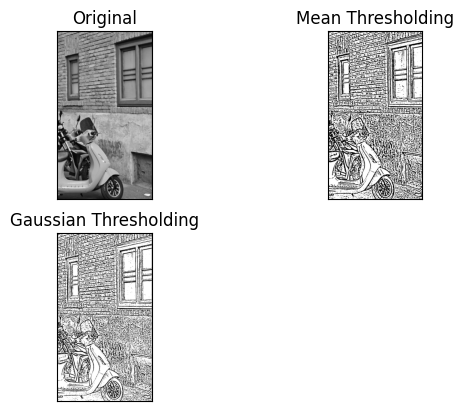

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(image_path,0)
img = cv.medianBlur(img,5)
th1 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
cv.THRESH_BINARY,11,2)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv.THRESH_BINARY,11,2)
titles = ['Original', 'Mean Thresholding', 'Gaussian Thresholding']
images = [img, th1, th2]

for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Filter

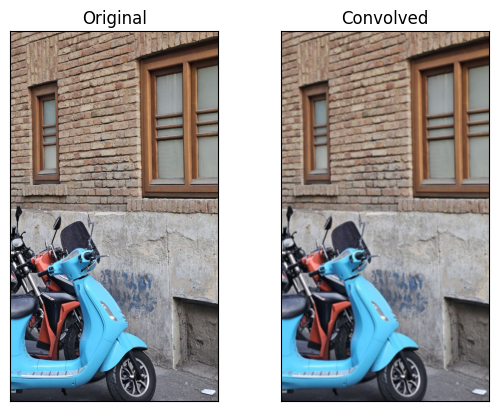

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(image_path)

kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img_rgb), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst_rgb), plt.title('Convolved')
plt.xticks([]), plt.yticks([])
plt.show()


## Edge Detection

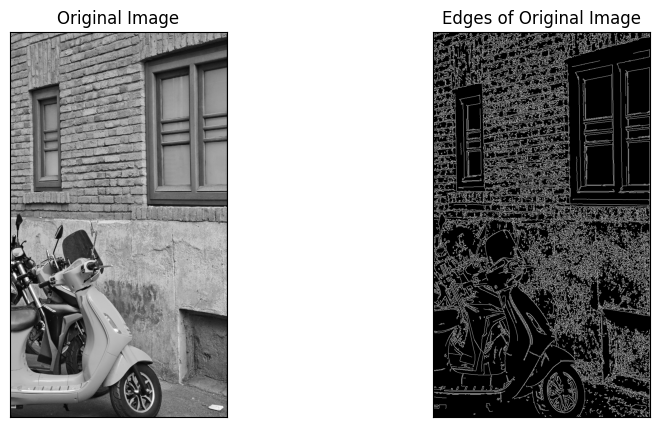

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread(image_path, 0)

edges = cv.Canny(img, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edges of Original Image'), plt.xticks([]), plt.yticks([])
plt.show()


## Histogram

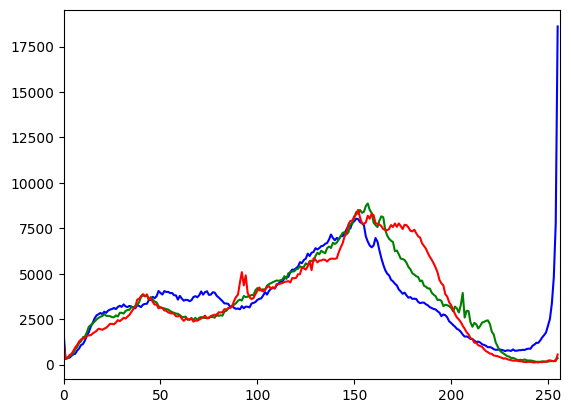

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image
img = cv.imread(image_path)

color = ('b', 'g', 'r')


for i, col in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)

plt.xlim([0, 256])
plt.show()


## Color Spaces

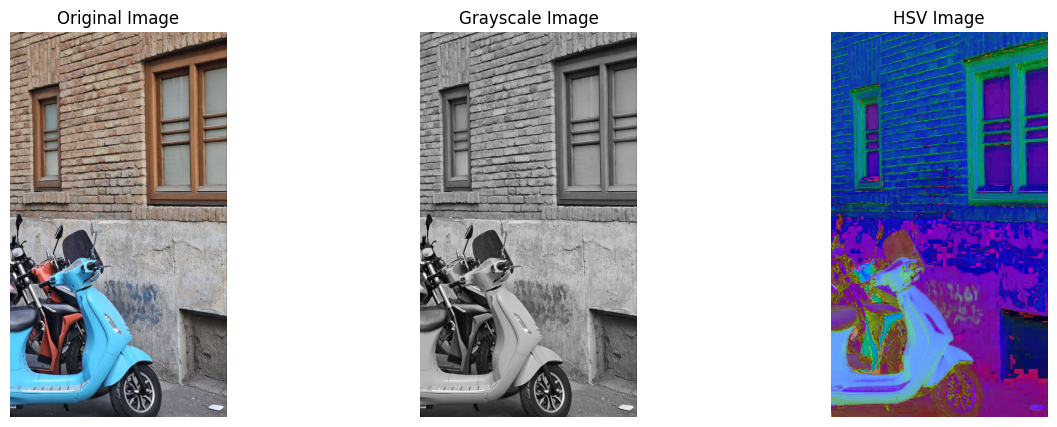

In [15]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(image_path)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img1, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(img2)
plt.title('HSV Image')
plt.axis('off')

plt.show()


## Morphological Transformations

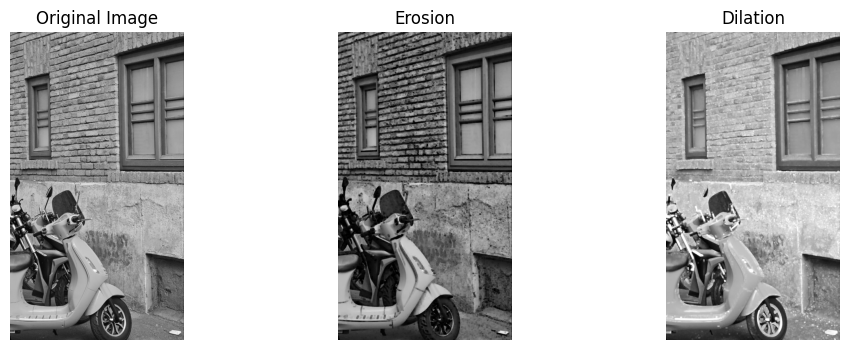

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(image_path, 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(img, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

plt.subplot(133)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.show()


## Image Contours

Following code is an example of drawing contours on an input image having three shapes
filled with black colours.
In the first step, we obtain a gray image and then perform the canny edge detection.
On the resultant image, we then call findContours() function. Its result is a point vector.
We then call the drawContours() function.
The complete code is as below:

Number of Contours = 4


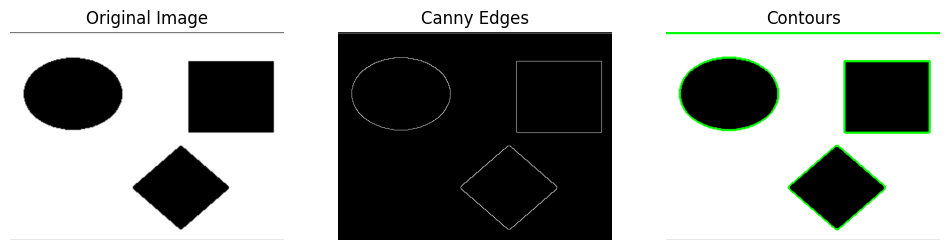

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('shapes.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 30, 200)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours =", len(contours))

img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()


## Template Matching

In an example below, an image having Indian cricketer Virat Kohli’s face is used as a
template to be matched with another image which depicts his photograph with another
Indian cricketer M.S.Dhoni.
Following program uses a threshold value of 80% and draws a rectangle around the
matching face:

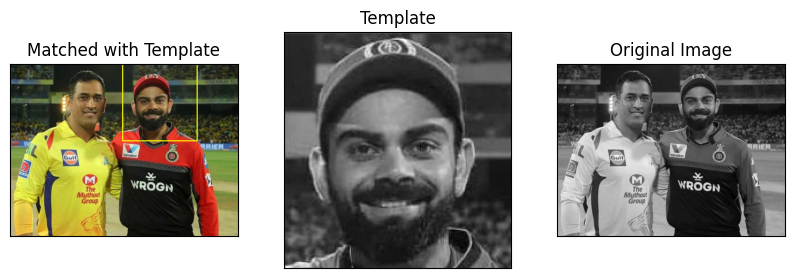

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('first.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template.png', 0)

w, h = template.shape[1], template.shape[0]
matched = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.323
loc = np.where(matched >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)


plt.figure(figsize=(10, 7))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Matched with Template')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(template, cmap='gray')
plt.title('Template')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.show()


## Image Addition

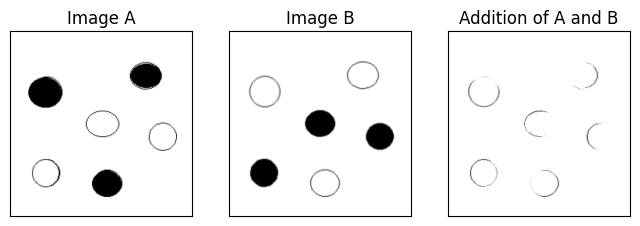

In [19]:
import cv2
import matplotlib.pyplot as plt

a = cv2.imread('a.png')
b = cv2.imread('b.png')

b_resized = cv2.resize(b, (a.shape[1], a.shape[0]))

if a.shape[2] != b_resized.shape[2]:
    b_resized = cv2.cvtColor(b_resized, cv2.COLOR_BGR2RGB)

img = cv2.add(a, b_resized)

plt.figure(figsize=(8, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
plt.title('Image A')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(cv2.cvtColor(b_resized, cv2.COLOR_BGR2RGB))
plt.title('Image B')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Addition of A and B')
plt.xticks([]), plt.yticks([])

plt.show()


## Fourier Transform

In [20]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
img = cv.imread('lena.jpg',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'dft'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


## Capture Video From Camera

In [ ]:
import cv2 as cv

cam = cv.VideoCapture(0)
cc = cv.VideoWriter_fourcc(*'XVID')
file = cv.VideoWriter('output.avi', cc, 15.0, (640, 480))

if not cam.isOpened():
    print("Error opening camera")
    exit()

while True:
    ret, frame = cam.read()

    # If frame is read correctly, ret is True
    if not ret:
        print("Error in retrieving frame")
        break
    file.write(frame)
    cv.imshow('Frame', frame)

    # Break the loop if the user presses 'q'
    if cv.waitKey(1) == ord('q'):
        break

# Release the camera and video writer resources
cam.release()
file.release()
cv.destroyAllWindows()


## Face Detection

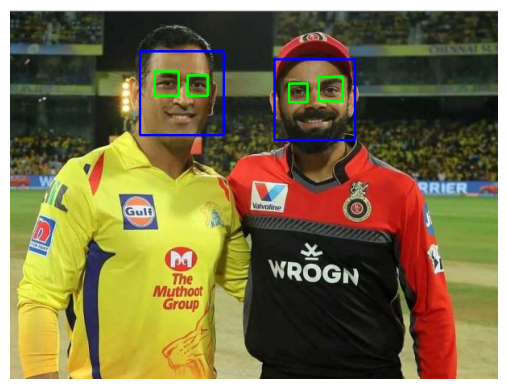

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('first.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]

    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


## Feature Detection

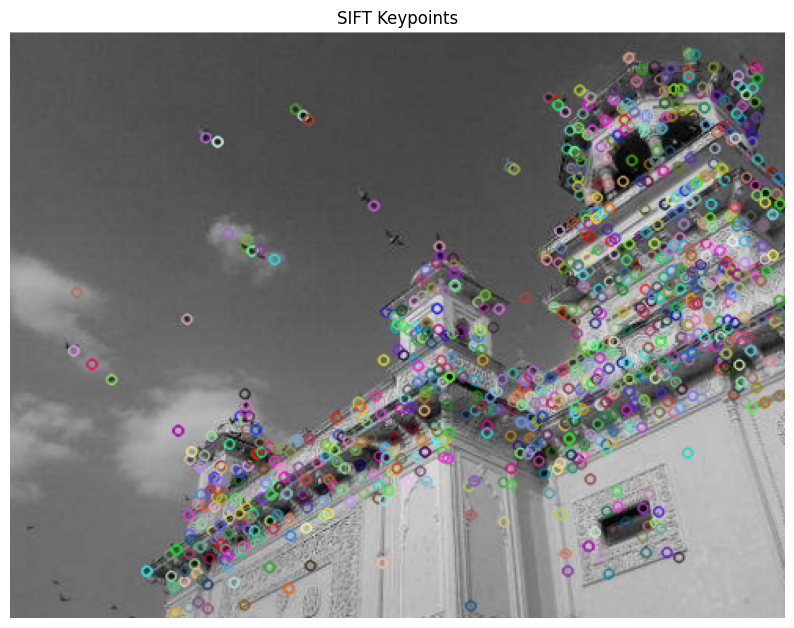

In [32]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('home.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray, None)
img = cv.drawKeypoints(gray, kp, img)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


## Feature Matching

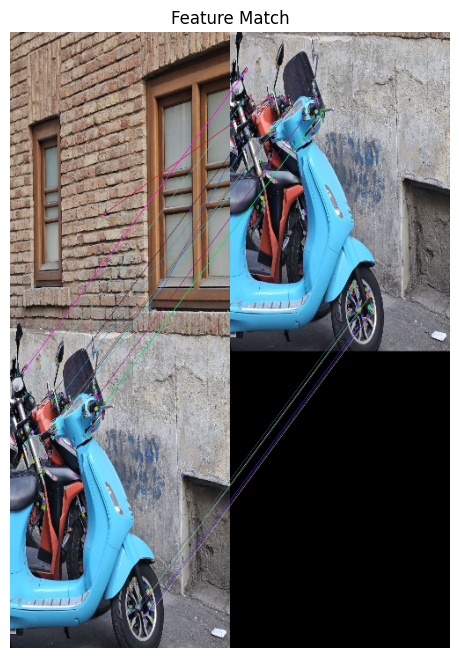

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('1.jpg')
img2 = cv2.imread('1-test.jpg')

img1_bw = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_bw = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()
queryKeypoints, queryDescriptors = orb.detectAndCompute(img1_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(img2_bw, None)

matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)

img = cv2.drawMatches(img1, queryKeypoints,
                      img2, trainKeypoints, matches[:20], None)

img = cv2.resize(img, (500, 700))


plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Feature Match")
plt.axis('off')
plt.show()
